### 1 - Imports Libraries

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

### 2 - Loading the data

In this practice lab we will work with Machine CPU 

In [157]:
# To hide warnings
import warnings
warnings.filterwarnings('ignore')

In [158]:
from sklearn.datasets import fetch_openml

machine_cpu = fetch_openml(name='machine_cpu')

In [159]:
type(machine_cpu)

sklearn.utils._bunch.Bunch

In [160]:
machine_cpu.data.shape

(209, 6)

In [161]:
print(machine_cpu.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

The problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine
 Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).
 The used attributes are :
 MYCT: machine cycle time in nanoseconds (integer)
 MMIN: minimum main memory in kilobytes (integer)
 MMAX: maximum main memory in kilobytes (integer)
 CACH: cache memory in kilobytes (integer)
 CHMIN: minimum channels in units (integer)
 CHMAX: maximum channels in units (integer)
 PRP: published relative performance (integer) (target variable)
 
 Original source: UCI machine learning repository. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 209 cases; 6 continuous variables

Downloaded from openml.org.


In [162]:
# display feature names

machine_cpu.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [163]:
# display the whole frame

machine_cpu.frame

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


Now let's get the data and labels

In [164]:
X = machine_cpu.data
y = machine_cpu.target

In [165]:
type(X)

pandas.core.frame.DataFrame

In [166]:
type(y)

pandas.core.series.Series

### 3 - Exploratory Analysis

but first we need to split our data

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"The size of train data is: {len(X_train)} \n The size of test data is: {len(X_test)}")

The size of train data is: 167 
 The size of test data is: 42


We can visualzie the data using histograms of all numeric features

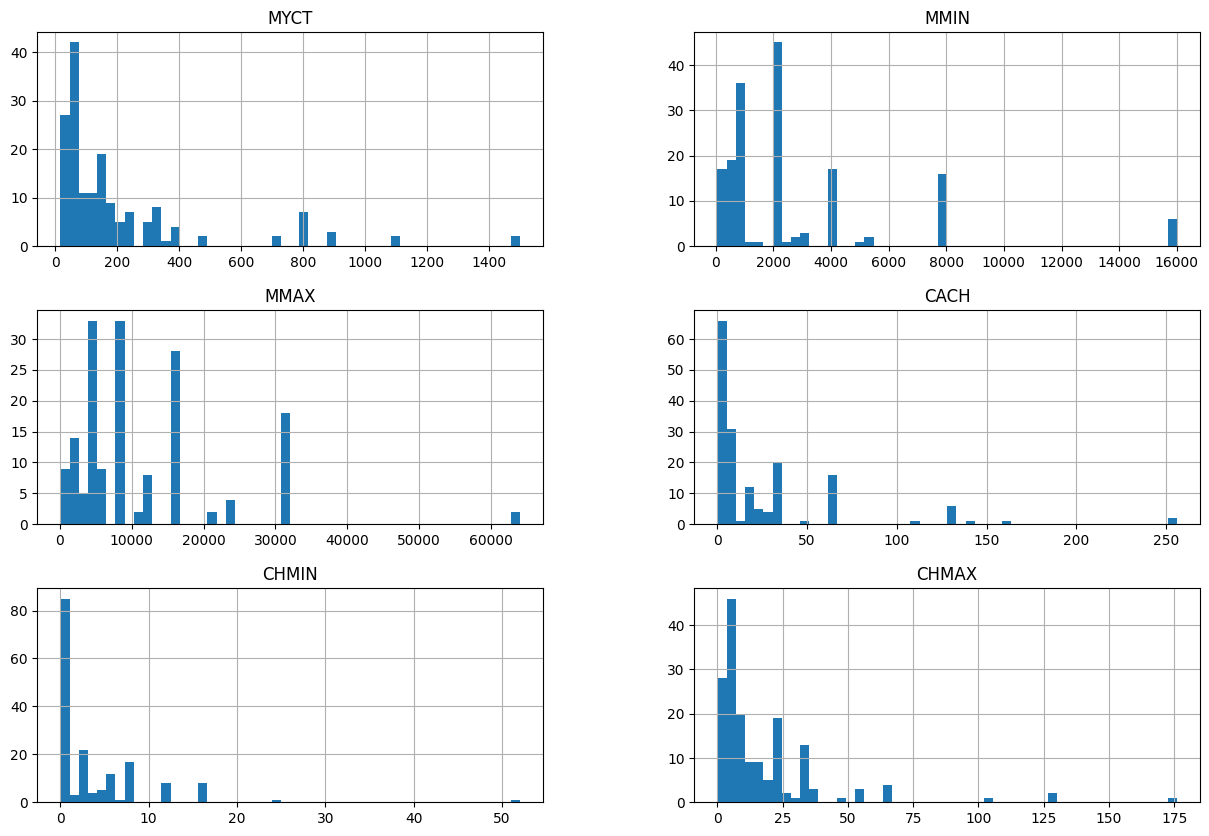

In [168]:
X_train.hist(bins=50, figsize=(15, 10))
plt.show()

Or we can use `sns.pairplot()` to look in the data
`sns.pairplot`: take each feature and plotted with other features

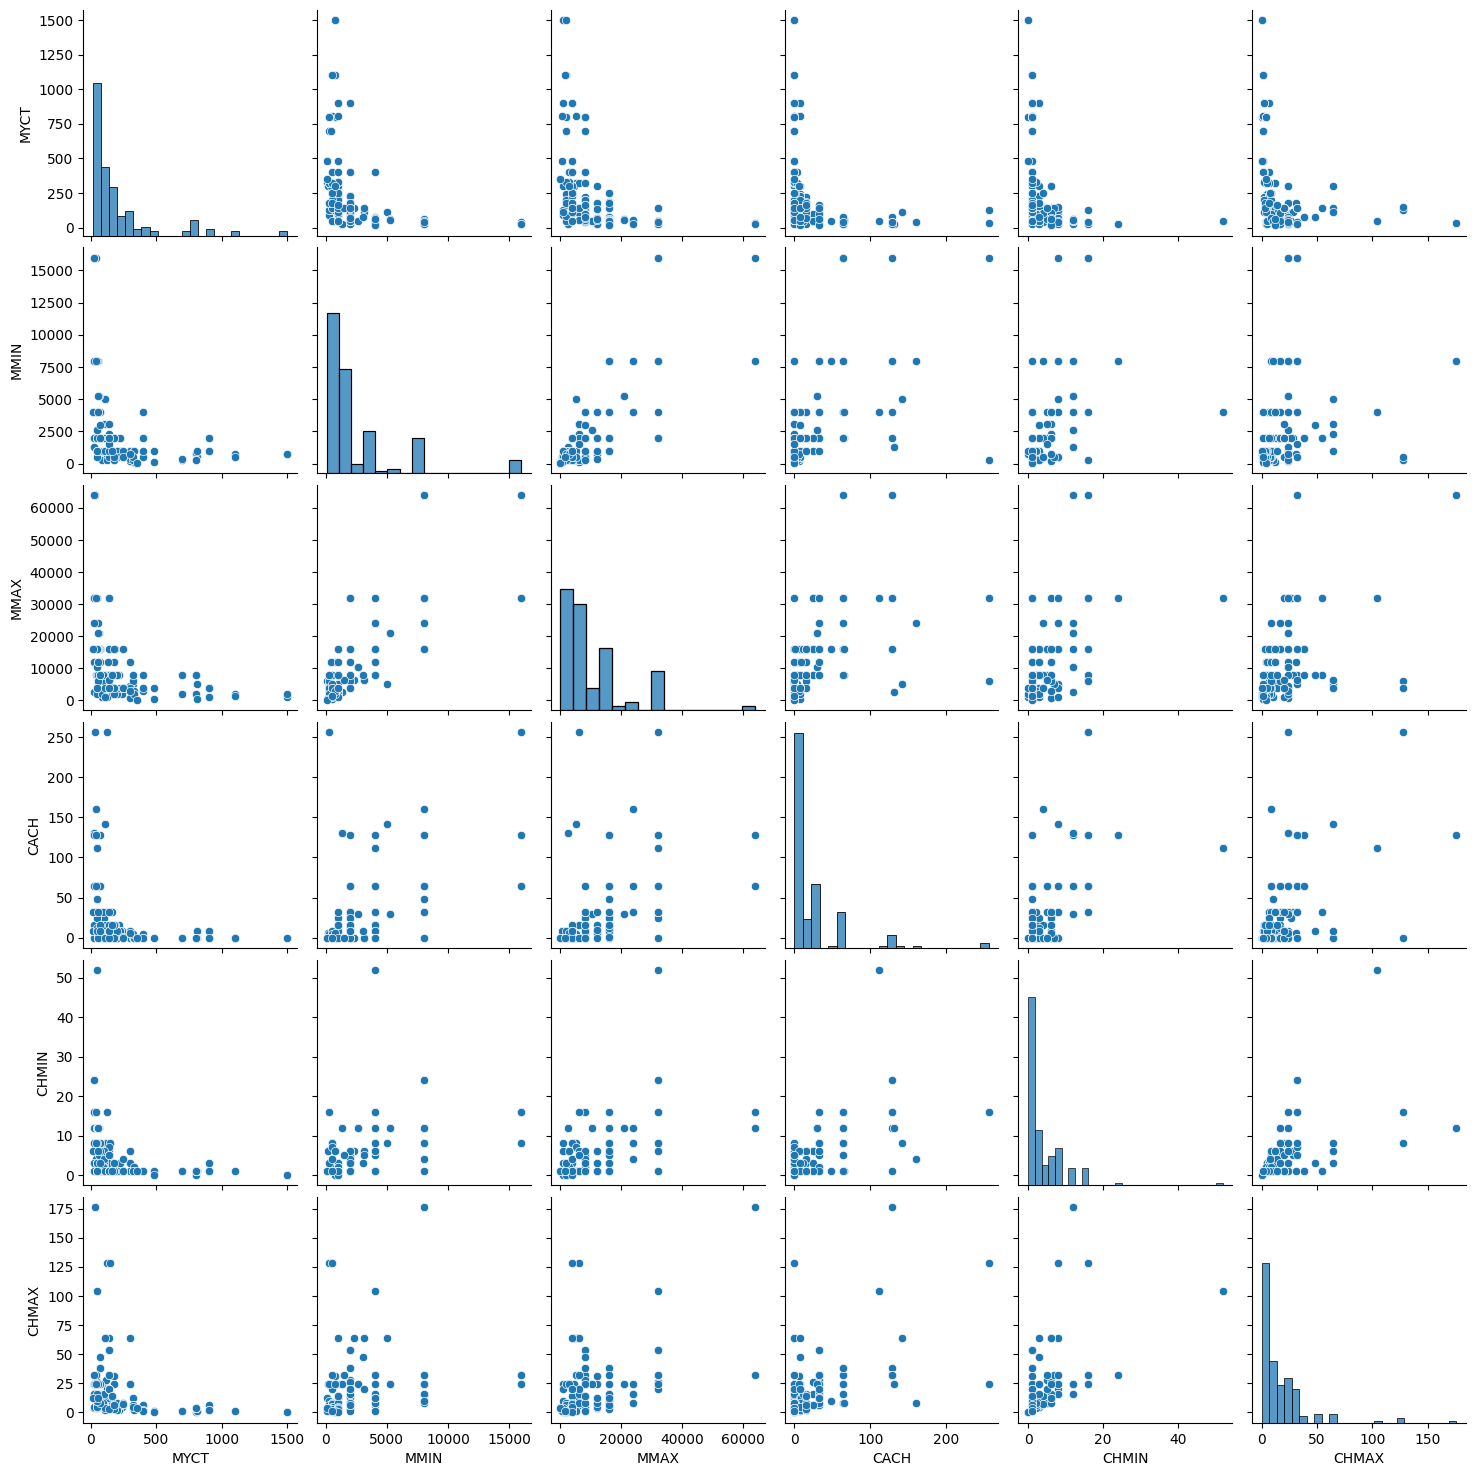

In [169]:
sns.pairplot(X_train)

In [170]:
# check summary stats

X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,207.000000,2782.550898,11459.736527,24.700599,4.245509,17.305389
std,268.017824,3373.265178,10852.659570,41.567990,5.765986,23.490504
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,112.000000,2000.000000,8000.000000,8.000000,1.000000,8.000000
75%,225.000000,3550.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,16000.000000,64000.000000,256.000000,52.000000,176.000000


In [171]:
# checking for missing data

X_train.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
dtype: int64

We can observe there no missing data

### 4 - Data Prepopcessing

Decision trees are not sensitive to feature scaling because their splits don’t <br>
Let verify or try to show that by testing

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scale_pipe = Pipeline([
    ('scaler', StandardScaler())
])

X_train_scaled = scale_pipe.fit_transform(X_train)

### 5 - Train Decision Tree Regressor

In [173]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

Now let's train our model on our scaled data

In [174]:
tree_reg_scaled = DecisionTreeRegressor()

tree_reg_scaled.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

### 6 - Evaluating Decision Trees


Let's check root mean squarred error on training data.

In [175]:
from sklearn.metrics import mean_squared_error

def predict(input_data, model, labels):

    """
        input_data: data that will predict their labels
        labels: actual labels of the data
        model: model (for example Decision tree)
    """

    preds = model.predict(input_data)
    mse = mean_squared_error(labels, preds)
    rmse = np.sqrt(mse)

    return rmse

In [176]:
predict(X_train, tree_reg, y_train)

np.float64(9.180872679309555)

Let's try with scaled data too

In [177]:
predict(X_train_scaled, tree_reg_scaled, y_train)

np.float64(9.180872679309555)

You can so their no difference between two predictions. weather you scaled your data or not it will not make difference

##### As you the model overfitted let's try to improve it 

### 7 - Imporving Decision Tree

But first we need to know about Grid Search 

We use `Grid Search` to find best hyperparameters. we will use it here to find right number of max_deth and other parameters (this can casuse overfitting)


In [184]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 'min_samples_split': [0, 1, 2, 3, 4], 'max_depth': [None, 0, 1, 2, 3]}

#refit is true by default. The best estimator is trained on the whole dataset 
# verbose: - This controls the level of output during execution.
#          - verbose=1 means the progress will be printed to the console while GridSearch is running.




grid_search = GridSearchCV(DecisionTreeRegressor(random_state=12), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12),
             param_grid={'max_depth': [None, 0, 1, 2, 3],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

#### refit is true by default. The best estimator is trained on the whole dataset 
#### `verbose=1`: 
- This controls the level of output during execution.
- `verbose=1` means the progress will be printed to the console while GridSearch is running.

#### `cv=3`
- This specifies 3-fold cross-validation.
- The dataset is split into 3 subsets:
- The model is trained on two subsets and validated on the remaining one.
- This process repeats 3 times, ensuring that each subset is used for validation once.

In [190]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 9, 'min_samples_split': 2}

In [191]:
grid_search.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=9, random_state=12)

In [192]:
tree_best = grid_search.best_estimator_

Let's make predictio on the training data again

In [193]:
predict(X_train, tree_best, y_train)

np.float64(35.14259103362479)

Let's test it on cross validation data

In [194]:
predict(X_test, tree_best, y_test)

np.float64(111.69673432585836)

Clearly, the model overfitted and the improvements we tried didn't improve anything. This is not an issue of the model or our approach to improve the model. Decision trees are complex models for the data we have. 